# Python program that generate a section of the London transport route map using graph data structure

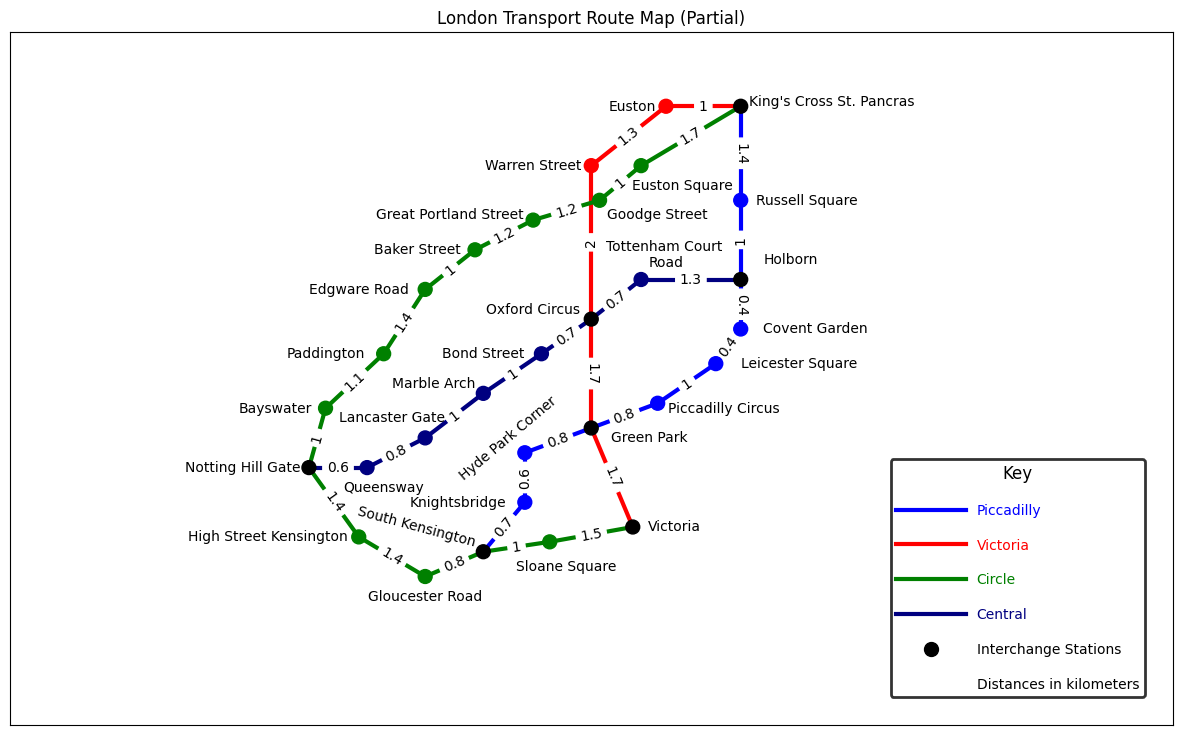

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

stations = {
    'Oxford Circus': (0, 1.2),
    'Green Park': (0,-1),
    'Piccadilly Circus': (0.8, -0.5),
    'Leicester Square': (1.5, 0.3),
    'Covent Garden': (1.8, 1),
    'Holborn': (1.8, 2),
    'Tottenham Court Road': (0.6, 2),
    'Bond Street': (-0.6, 0.5),
    'Marble Arch': (-1.3, -0.3),
    'Lancaster Gate': (-2, -1.2), 
    'Queensway': (-2.7, -1.8),
    'Notting Hill Gate': (-3.4, -1.8),
    'High Street Kensington': (-2.8,-3.2),
    'Gloucester Road': (-2,-4),
    'South Kensington': (-1.3, -3.5),
    'Knightsbridge': (-0.8, -2.5),
    'Hyde Park Corner': (-0.8, -1.5),
    'Bayswater': (-3.2, -0.6),
    'Paddington': (-2.5, 0.5),
    'Edgware Road': (-2, 1.8),
    'Baker Street': (-1.4, 2.6),
    'Great Portland Street': (-0.7, 3.2),
    'Warren Street': (0, 4.3),
    'Goodge Street': (0.1, 3.6),
    'Euston Square': (0.6, 4.3),
    'Euston': (0.9, 5.5),
    'King\'s Cross St. Pancras':(1.8, 5.5),
    'Russell Square':(1.8, 3.6),
    'Victoria': (0.5, -3),
    'Sloane Square': (-0.5, -3.3)
}

for station, pos in stations.items():
    G.add_node(station, pos=pos)

# Define edges for different lines with different colors
piccadilly_line_edges = [
    ('Piccadilly Circus', 'Leicester Square', 1),
    ('Green Park', 'Piccadilly Circus', 0.8),
    ('Leicester Square', 'Covent Garden', 0.4),
    ('Covent Garden', 'Holborn', 0.4),
    ('Hyde Park Corner', 'Green Park', 0.8),
    ('Hyde Park Corner', 'Knightsbridge', 0.6),
    ('Knightsbridge', 'South Kensington', 0.7),
    ('Russell Square', 'King\'s Cross St. Pancras', 1.4),
    ('Holborn', 'Russell Square', 1)
]

victoria_line_edges = [
    ('Oxford Circus', 'Green Park', 1.7),
    ('Oxford Circus', 'Warren Street', 2),
    ('Warren Street', 'Euston', 1.3),
    ('Euston','King\'s Cross St. Pancras', 1),
    ('Green Park', 'Victoria', 1.7)
    
]

circle_line_edges = [
    ('High Street Kensington', 'Gloucester Road', 1.4),
    ('South Kensington','Gloucester Road', 0.8),
    ('High Street Kensington', 'Notting Hill Gate', 1.4),
    ('Notting Hill Gate', 'Bayswater', 1),
    ('Bayswater', 'Paddington', 1.1),
    ('Paddington', 'Edgware Road', 1.4),
    ('Edgware Road', 'Baker Street', 1),
    ('Baker Street', 'Great Portland Street', 1.2),
    ('Great Portland Street', 'Goodge Street', 1.2),
    ('Goodge Street', 'Euston Square', 1),
    ('Euston Square', 'King\'s Cross St. Pancras', 1.7),
    ('South Kensington', 'Sloane Square', 1),
    ('Sloane Square', 'Victoria', 1.5)
]

central_line_edges = [
    ('Notting Hill Gate', 'Queensway', 0.6),
    ('Queensway', 'Lancaster Gate', 0.8),
    ('Lancaster Gate', 'Marble Arch', 1),
    ('Marble Arch', 'Bond Street', 1),
    ('Bond Street', 'Oxford Circus', 0.7),
    ('Oxford Circus', 'Tottenham Court Road', 0.7),
    ('Tottenham Court Road', 'Holborn', 1.3)
]

# Add edges to the graph
for edge in piccadilly_line_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

for edge in victoria_line_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

for edge in circle_line_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

for edge in central_line_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Get positions of nodes
pos = nx.get_node_attributes(G, 'pos')

# Define colors of nodes
node_colors = {
    'Tottenham Court Road':'navy',
    'Oxford Circus': 'black',
    'Holborn': 'black',
    'Bond Street': 'navy',
    'Marble Arch': 'navy',
    'Lancaster Gate': 'navy',
    'Queensway': 'navy',
    'Notting Hill Gate': 'black',
    'High Street Kensington': 'green',
    'Gloucester Road': 'green',
    'South Kensington': 'black',
    'Knightsbridge': 'blue',
    'Hyde Park Corner': 'blue',
    'Green Park': 'black',
    'Piccadilly Circus': 'blue',
    'Leicester Square': 'blue',
    'Covent Garden': 'blue',
    'Bayswater': 'green',
    'Paddington': 'green',
    'Edgware Road': 'green',
    'Baker Street': 'green',
    'Great Portland Street': 'green',
    'Warren Street': 'red',
    'Goodge Street': 'green',
    'Euston Square': 'green',
    'Euston': 'red',
    'King\'s Cross St. Pancras': 'black',
    'Russell Square': 'blue',
    'Victoria': 'black',
    'Sloane Square': 'green'
    
}

# Draw the graph
plt.figure(figsize=(15, 9))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=[node_colors[station] for station in stations])

# Draw edges with different colors
# Extracts the node pairs for drawing edges while ignoring the weights.
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, w in piccadilly_line_edges], width=3, edge_color='blue')
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, w in victoria_line_edges], width=3, edge_color='red')
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, w in circle_line_edges], width=3, edge_color='green')
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, w in central_line_edges], width=3, edge_color='navy')


# Draw and adjust label positions
plt.text(-1, -1.2, 'Hyde Park Corner', rotation=40, fontsize=10, ha='center', va='center')
plt.text(0.7,-1.2, 'Green Park', fontsize=10, ha='center', va='center')
plt.text(1.6, -0.6, 'Piccadilly Circus', fontsize=10, ha='center', va='center')
plt.text(2.5, 0.3, 'Leicester Square', fontsize=10, ha='center', va='center')
plt.text(2.7, 1, 'Covent Garden', fontsize=10, ha='center', va='center')
plt.text(2.4, 2.4, 'Holborn', fontsize=10, ha='center', va='center')
plt.text(0.9, 2.5, 'Tottenham Court \nRoad', fontsize=10, ha='center', va='center')
plt.text(-0.7, 1.4, 'Oxford Circus', fontsize=10, ha='center', va='center')
plt.text(-1.3, 0.5, 'Bond Street', fontsize=10, ha='center', va='center')
plt.text(-1.9, -0.1, 'Marble Arch', fontsize=10, ha='center', va='center')
plt.text(-2.4, -0.8, 'Lancaster Gate', fontsize=10, ha='center', va='center')
plt.text(-2.5, -2.2, 'Queensway', fontsize=10, ha='center', va='center')
plt.text(-4.2, -1.8, 'Notting Hill Gate', fontsize=10, ha='center', va='center')
plt.text(-3.9, -3.2, 'High Street Kensington', fontsize=10, ha='center', va='center')
plt.text(-2,-4.4, 'Gloucester Road', fontsize=10, ha='center', va='center')
plt.text(-2.1, -3, 'South Kensington', rotation=-15, fontsize=10, ha='center', va='center')
plt.text(-1.6, -2.5, 'Knightsbridge', fontsize=10, ha='center', va='center')
plt.text(-3.8, -0.6, 'Bayswater', fontsize=10, ha='center', va='center')
plt.text(-3.2, 0.5, 'Paddington', fontsize=10, ha='center', va='center')
plt.text(-2.8, 1.8, 'Edgware Road', fontsize=10, ha='center', va='center')
plt.text(-2.1, 2.6, 'Baker Street', fontsize=10, ha='center', va='center')
plt.text(-1.7, 3.3, 'Great Portland Street', fontsize=10, ha='center', va='center')
plt.text(-0.7, 4.3, 'Warren Street', fontsize=10, ha='center', va='center')
plt.text(0.8, 3.3, 'Goodge Street', fontsize=10, ha='center', va='center')
plt.text(1.1, 3.9, 'Euston Square', fontsize=10, ha='center', va='center')
plt.text(0.5, 5.5, 'Euston', fontsize=10, ha='center', va='center')
plt.text(2.9, 5.6, 'King\'s Cross St. Pancras', fontsize=10, ha='center', va='center')
plt.text(2.6, 3.6, 'Russell Square', fontsize=10, ha='center', va='center')
plt.text(1, -3, 'Victoria', fontsize=10, ha='center', va='center')
plt.text(-0.3, -3.8, 'Sloane Square', fontsize=10, ha='center', va='center')

# Get edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')


# Lock the axis limits to prevent rescaling
plt.xlim(-7, 7)  # Set these values based on the overall graph extent
plt.ylim(-7, 7)  # Adjust these to prevent the graph from rescaling

# Add a custom line for the legend
plt.plot([], [], color='blue', linewidth=3, label='Piccadilly')
plt.plot([], [], color='red', linewidth=3, label='Victoria')
plt.plot([], [], color='green', linewidth=3, label='Circle')
plt.plot([], [], color='navy', linewidth=3, label='Central')
plt.plot([], [], 'o', color='black', markersize=10, label='Interchange Stations')
plt.plot([], [], ' ', label='Distances in kilometers') 

# Add a legend for the Piccadilly line
legend = plt.legend(loc='lower right', title='Key', frameon=True, fontsize=10, 
                    title_fontsize=12, labelspacing=1.5, borderaxespad=2, handlelength=5)


# Adjust the legend length and border
frame = legend.get_frame()
frame.set_edgecolor('black')  
frame.set_linewidth(2)        

# Change the font color of individual labels in the legend
legend.get_texts()[0].set_color("blue")  # Change the color of the first label
legend.get_texts()[1].set_color("red")
legend.get_texts()[2].set_color("green")
legend.get_texts()[3].set_color("navy")
legend.get_texts()[4].set_color("black")

# Add a title
plt.title('London Transport Route Map (Partial)')

# Show the plot
plt.show()